In [557]:
# Version 3.0.1
# Title: Flow Distribution in a Doublet EGS
# Authors: Pranay Asai (UoU) & Robert Podgorney (INL)
# Edited by: Pranay Asai
# Date: 06/26/2021
# Updates:
#     1. Minor Corrections

## NOTE: The CSV file titled "testpheta.csv" must be in the same folder as this notebook to run

In [558]:
#      o----/\/\/\----|----/\/\/\----|----/\/\/\----|----/\/\/\----|
#                     |              |              |              |
#                     /              /              /              /
#                     \              \              \              /
#                     /              /              /              /
#                     |              |              |              |
#      o----/\/\/\----|----/\/\/\----|----/\/\/\----|----/\/\/\----|

#                 |----/\/\/\----|----/\/\/\----|----/\/\/\----|----/\/\/\----o
#                 |              |              |              |
#                 /              /              /              /
#                 \              \              \              \
#                 /              /              /              /
#                 |              |              |              |
#  o----/\/\/\----|----/\/\/\----|----/\/\/\----|----/\/\/\----|

In [288]:
import numpy as np  #Importing NumPy4
import math
import matplotlib.pyplot as plt
import random
from ipynb.fs.defs.FrictionFactors import * #Imports all the functions
import pandas as pd

In [289]:
import platform
is_windows = any(platform.win32_ver())
if is_windows==True:
    path=r'CustomPath'
else:
    path=r'/Users/willba/Desktop/Flowratestudy'

In [290]:
#For Fracture
NumberOfFractures=3
TotalWellLength=3227 #m, Length of the well
BasePermeability=1e-12 #m2, #Fracture base Permebility
FractureHeight=100 #m Fracture entrance length
FractureWidth=5.0 #m Fracture entrance pseudo width
BaseFractureLength=100 #m Height of fractures
Area_FractureEntrance=FractureHeight*FractureWidth #Area of fracture for the fluid to enter

#For Pipe
Diameter_InjectionWell=0.18#*(0.5/0.1524)   #m Diameter of the Injection Pipe
Diameter_ProductionWell=0.18#*(0.5/0.1524)  #m Diameter of the Production Pipe
Area_InjectionWell=math.pi*Diameter_InjectionWell**2*0.25 #meters sq.
Area_ProductionWell=math.pi*Diameter_InjectionWell**2*0.25 #meters sq.
DensityWater=1000 #kg/s
e=0.015/1000  #roughness in m
BaseInjectionWellSection=TotalWellLength/NumberOfFractures #m Length of Inj pipe section
BaseProductionWellSection=TotalWellLength/NumberOfFractures #m Length of Prod pipe section

#For Perforation
LengthOfPerfZone=1 #m, length og each perf zone
Cd=0.75 #Discharge Coefficient
NumberOfPerfPerMeter=50 # Number of perforations per meter
NumberOfPerfs=LengthOfPerfZone*NumberOfPerfPerMeter #Number of Perforations
BaseDiameter_InjectionPerforation=0.003175*3#*0.5 #m, Diameter of perforations
BaseDiameter_ProductionPerforation=0.003175*3#*0.5 #m, Diameter of perforations

In [291]:
#Initialization
Pressure_Injection=np.zeros(NumberOfFractures+1)
Pressure_Production=np.zeros(NumberOfFractures+1)
Pressure_Fracture=np.zeros(NumberOfFractures)
Flowrate_Fracture=np.zeros(NumberOfFractures)
FractureLength=np.zeros(NumberOfFractures)
InjectionWellSection=np.zeros(NumberOfFractures+1)
ProductionWellSection=np.zeros(NumberOfFractures+1)
Permeability_Fracture=np.zeros(NumberOfFractures)
Diameter_InjectionPerforation=np.zeros(NumberOfFractures)
Diameter_ProductionPerforation=np.zeros(NumberOfFractures)
WellAngle=0

#NOTE: 1800 data points were taken, 5 rows of data including well angle, fracture 1,2 and 3 flow distribution,
# and pressure drop(PSI)
storage = np.zeros((1800,5))

In [292]:
#Flow Rate and Pressure
Flowrate_Initial=50 #kg/s
Pressure_Injection[0]=3e7


In [293]:
#CONTROL VARIABLES

#Turn on pressure drop in injection well
InjectionWellActivate=1 #if 1, the pressure drop in the well is on
#Turn on pressure drop in production well
ProductionWellActivate=1 #if 1, the pressure drop in the well is on
#Activate Perforation
ActivateInjectionPerforations=1  #If 0, perforation pressure drop is zero.
#activate production well perforation
ActivateProductionPerforations=0

#Variable Permeablity
# If 0, All fractures have same permeability
# If 1, The permeability values are assigned at random with respect to the base value
# If 2, Option to input custom permeability values.
VariablePermeability=0

# NOTE: Import fracture spacing from testpheta CSV file or the code will not run
pwo = pd.read_csv('testpheta.csv')
pwo2 = pd.DataFrame(pwo)
dls = pwo2.to_numpy()
d1 = dls[0:1800,0]
print(len(d1))
#dl = 0
#ORIENTATION OF WELLS
# If 1, The wells are Parallel
# If 2, The wells are Anti-Parallel
# If 3, The wells are Non-Parallel  # Input the Difference between first and last fracture
WellsOrientation=3

if WellsOrientation==3:
    #d1=float(input("Enter the difference between the first and last fracture size: "))
    #print(dl)
    #dl = 7.534760914
    BaseFractureLength=BaseFractureLength-d1[0]/2
    WellAngle=math.atan((d1[0]/2)/((NumberOfFractures-1)*BaseInjectionWellSection)) #Angle of Injection well
    print(math.degrees(WellAngle)*2)



#Adaptive Perforation (Still in test phase)
# If 0, Adaptive Perforations are turned off
# If 1, Adaptive Perforations are turned on
# If 2, Custom input for Perforations
AdaptivePerf=0

1800
0.10033542524494841


In [294]:
#Calculate Fracture Permeability
#Function is defined as:
# var1*BasePermeability*(10^var2), where Var1 varies from 1 to 10 and Var2 varies from -1, 0 or 1, at random.
if VariablePermeability!=2:
    Permeability_Fracture=FracturePermeability(NumberOfFractures,BasePermeability,FractureWidth,FractureHeight,VariablePermeability)
else:
    for i in range(NumberOfFractures):
        #Define any custom function
        if i%2==0:
            Permeability_Fracture[i]=BasePermeability/2
        else:
            Permeability_Fracture[i]=BasePermeability

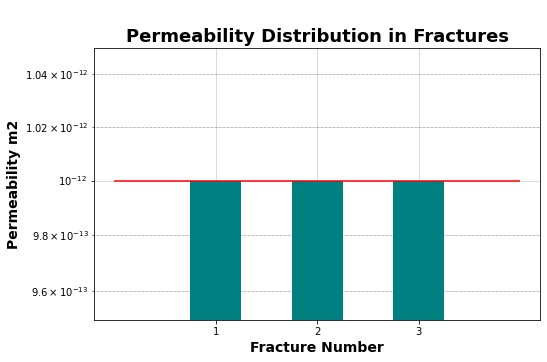

In [295]:
pplots(Permeability_Fracture,NumberOfFractures,"Permeability","yes",path)

In [296]:
#Calculate Perforations
Diameter_InjectionPerforation=AdaptivePerforation(WellsOrientation,VariablePermeability,AdaptivePerf,NumberOfFractures,Diameter_InjectionPerforation,BaseDiameter_InjectionPerforation,Permeability_Fracture)
Diameter_ProductionPerforation=AdaptivePerforation(WellsOrientation,VariablePermeability,AdaptivePerf,NumberOfFractures,Diameter_ProductionPerforation,BaseDiameter_ProductionPerforation,Permeability_Fracture)
print(Diameter_InjectionPerforation)
print(Diameter_ProductionPerforation)
print(Area_FractureEntrance)

[0.009525 0.009525 0.009525]
[0.009525 0.009525 0.009525]
500.0


In [297]:
#Define a custom fucntion for Perforation diameters
if AdaptivePerf==2:
    for i in range(NumberOfFractures-1):
        #Define any custom function
        Diameter_InjectionPerforation[i]=BaseDiameter_InjectionPerforation
        Diameter_ProductionPerforation[i]=BaseDiameter_InjectionPerforation
    Diameter_InjectionPerforation[2] = 0.0076
    Diameter_ProductionPerforation[2] = 0.0076
print(Diameter_InjectionPerforation)
print(Diameter_ProductionPerforation)


[0.009525 0.009525 0.009525]
[0.009525 0.009525 0.009525]


In [298]:
counter = 0

while counter <= (len(d1)-1):
    
    Pressure_Injection=np.zeros(NumberOfFractures+1)
    Pressure_Production=np.zeros(NumberOfFractures+1)
    Pressure_Fracture=np.zeros(NumberOfFractures)
    Flowrate_Fracture=np.zeros(NumberOfFractures)
    Pressure_Injection[0]=3e7
    MaxIterations=1000 #number of iterations
    #mmax=10000 #max number of iterations
    Tolerance=1e-6 #Tolerance
    FactorTest = 1000 #NumberOfFractures*FractureHeight
    Flowrate_Update=np.zeros(NumberOfFractures)
    Flowrate_Frac1=np.zeros(MaxIterations)
    Flowrate_Frac2=np.zeros(MaxIterations)
    Flowrate_Frac3=np.zeros(MaxIterations)
    BaseFractureLength = 100
    WellAngle = 0
    
    
    if WellsOrientation==3:
        #d1=float(input("Enter the difference between the first and last fracture size: "))
        #print(dl)
        #dl = 7.534760914
        BaseFractureLength=BaseFractureLength-d1[counter]/2
        WellAngle=math.atan((d1[counter]/2)/((NumberOfFractures-1)*BaseInjectionWellSection)) #Angle of Injection well
        print(math.degrees(WellAngle)*2)

    for i in range(NumberOfFractures):
        Flowrate_Fracture[i]=Flowrate_Initial/NumberOfFractures
        FractureLength[i]=abs(BaseFractureLength+(NumberOfFractures-i-1)*math.tan(WellAngle)*BaseInjectionWellSection+(NumberOfFractures-i-1)*math.tan(WellAngle)*BaseProductionWellSection)
    for i in range(NumberOfFractures+1):
        InjectionWellSection[i]=BaseInjectionWellSection/math.cos(WellAngle)
        ProductionWellSection[i]=BaseProductionWellSection/math.cos(WellAngle)

        

    

    for j in range(MaxIterations):
        Flowrate_Cumulative=Flowrate_Initial/FactorTest
        #pressure drop in injection well
        for i in range(NumberOfFractures):
            if InjectionWellActivate==0:
                Pressure_Injection[i+1]=Pressure_Injection[i]
            else:            
                Pressure_Injection[i+1]=Pressure_Injection[i]-Fhal(e,Diameter_InjectionWell,Rep(Flowrate_Cumulative,Diameter_InjectionWell))*2*InjectionWellSection[i+1]*DensityWater*(Flowrate_Cumulative/Area_InjectionWell)**2/Diameter_InjectionWell
            Flowrate_Cumulative=Flowrate_Cumulative-Flowrate_Fracture[i]/FactorTest

        #Pressure drop in Production well
        Flowrate_Cumulative=Flowrate_Fracture[NumberOfFractures-1]/FactorTest
        if WellsOrientation!=2:
            #pressure drops in last Fracture
            if ActivateInjectionPerforations==1 and ActivateProductionPerforations==1: #Activate all perforations
                Pressure_Production[NumberOfFractures]=Pressure_Injection[NumberOfFractures]-Pfdarcy(Flowrate_Fracture[NumberOfFractures-1]/FactorTest,FractureLength[NumberOfFractures-1],Area_FractureEntrance,Permeability_Fracture[NumberOfFractures-1])-Pperf(Flowrate_Fracture[NumberOfFractures-1]/FactorTest,Cd,NumberOfPerfs,Diameter_InjectionPerforation[NumberOfFractures-1])-Pperf(Flowrate_Fracture[NumberOfFractures-1]/FactorTest,Cd,NumberOfPerfs,Diameter_ProductionPerforation[NumberOfFractures-1])
            elif ActivateInjectionPerforations==0 and ActivateProductionPerforations==1: #Activate only production perforations
                Pressure_Production[NumberOfFractures]=Pressure_Injection[NumberOfFractures]-Pfdarcy(Flowrate_Fracture[NumberOfFractures-1]/FactorTest,FractureLength[NumberOfFractures-1],Area_FractureEntrance,Permeability_Fracture[NumberOfFractures-1])-Pperf(Flowrate_Fracture[NumberOfFractures-1]/FactorTest,Cd,NumberOfPerfs,Diameter_ProductionPerforation[NumberOfFractures-1])
            elif ActivateInjectionPerforations==1 and ActivateProductionPerforations==0: #Activate only injection perforations
                Pressure_Production[NumberOfFractures]=Pressure_Injection[NumberOfFractures]-Pfdarcy(Flowrate_Fracture[NumberOfFractures-1]/FactorTest,FractureLength[NumberOfFractures-1],Area_FractureEntrance,Permeability_Fracture[NumberOfFractures-1])-Pperf(Flowrate_Fracture[NumberOfFractures-1]/FactorTest,Cd,NumberOfPerfs,Diameter_InjectionPerforation[NumberOfFractures-1])
            elif ActivateInjectionPerforations==0 and ActivateProductionPerforations==0: #Turn off all perforations
                Pressure_Production[NumberOfFractures]=Pressure_Injection[NumberOfFractures]-Pfdarcy(Flowrate_Fracture[NumberOfFractures-1]/FactorTest,FractureLength[NumberOfFractures-1],Area_FractureEntrance,Permeability_Fracture[NumberOfFractures-1])


            for i in range(NumberOfFractures,0,-1):
                #turning off production well pressure drop
                if ProductionWellActivate==0:
                    Pressure_Production[i-1]=Pressure_Production[i]
                else:
                    Pressure_Production[i-1]=Pressure_Production[i]-Fhal(e,Diameter_ProductionWell,Rep(Flowrate_Cumulative,Diameter_ProductionWell))*2*ProductionWellSection[i-1]*DensityWater*(Flowrate_Cumulative/Area_ProductionWell)**2/Diameter_ProductionWell
                Flowrate_Cumulative=Flowrate_Cumulative+Flowrate_Fracture[i-1]/FactorTest
            #Flow Rate in all Fractures
            Flowrate_Reinitilized=0
            for i in range(NumberOfFractures):
                Pressure_Fracture[i]=Pressure_Injection[i+1]-Pressure_Production[i+1]
                if ActivateInjectionPerforations==1 and ActivateProductionPerforations==1: #Activate all perforations
                    Flowrate_Fracture[i]=Q_all_perfs(Pressure_Fracture[i],FractureLength[i],Area_FractureEntrance,Permeability_Fracture[i],Cd,NumberOfPerfs,Diameter_InjectionPerforation[i],Diameter_ProductionPerforation[i])*FactorTest
                elif ActivateInjectionPerforations==0 and ActivateProductionPerforations==1: #Activate only production perforations
                    Flowrate_Fracture[i]=Q_Production_perfs(Pressure_Fracture[i],FractureLength[i],Area_FractureEntrance,Permeability_Fracture[i],Cd,NumberOfPerfs,Diameter_ProductionPerforation[i])*FactorTest
                elif ActivateInjectionPerforations==1 and ActivateProductionPerforations==0: #Activate only injection perforations
                    Flowrate_Fracture[i]=Q_Injection_perfs(Pressure_Fracture[i],FractureLength[i],Area_FractureEntrance,Permeability_Fracture[i],Cd,NumberOfPerfs,Diameter_InjectionPerforation[i])*FactorTest
                elif ActivateInjectionPerforations==0 and ActivateProductionPerforations==0: #Turn off all perforations            
                    Flowrate_Fracture[i]=Q_No_perfs(Pressure_Fracture[i],FractureLength[i],Area_FractureEntrance,Permeability_Fracture[i])*FactorTest

                Flowrate_Reinitilized=Flowrate_Reinitilized+Flowrate_Fracture[i]
        else:
            #pressure drops in First Fracture
            if ActivateInjectionPerforations==1 and ActivateProductionPerforations==1: #Activate all perforations
                Pressure_Production[0]=Pressure_Injection[1]-Pfdarcy(Flowrate_Fracture[0]/FactorTest,FractureLength[0],Area_FractureEntrance,Permeability_Fracture[0])-Pperf(Flowrate_Fracture[0]/FactorTest,Cd,NumberOfPerfs,Diameter_InjectionPerforation[0])-Pperf(Flowrate_Fracture[0]/FactorTest,Cd,NumberOfPerfs,Diameter_ProductionPerforation[0])
            elif ActivateInjectionPerforations==0 and ActivateProductionPerforations==1: #Activate only production perforations
                Pressure_Production[0]=Pressure_Injection[1]-Pfdarcy(Flowrate_Fracture[0]/FactorTest,FractureLength[0],Area_FractureEntrance,Permeability_Fracture[0])-Pperf(Flowrate_Fracture[0]/FactorTest,Cd,NumberOfPerfs,Diameter_ProductionPerforation[0])
            elif ActivateInjectionPerforations==1 and ActivateProductionPerforations==0: #Activate only injection perforations    
                Pressure_Production[0]=Pressure_Injection[1]-Pfdarcy(Flowrate_Fracture[0]/FactorTest,FractureLength[0],Area_FractureEntrance,Permeability_Fracture[0])-Pperf(Flowrate_Fracture[0]/FactorTest,Cd,NumberOfPerfs,Diameter_InjectionPerforation[0])
            elif ActivateInjectionPerforations==0 and ActivateProductionPerforations==0: #Turn off all perforations    
                Pressure_Production[0]=Pressure_Injection[1]-Pfdarcy(Flowrate_Fracture[0]/FactorTest,FractureLength[0],Area_FractureEntrance,Permeability_Fracture[0])

            #Pressure drop in Production well
            Flowrate_ProductionReinitilized=0
            for i in range(NumberOfFractures):
                Flowrate_ProductionReinitilized=Flowrate_ProductionReinitilized+Flowrate_Fracture[i]/FactorTest
                if ProductionWellActivate==0:
                    Pressure_Production[i+1]=Pressure_Production[i]
                else:
                    Pressure_Production[i+1]=Pressure_Production[i]-Fhal(e,Diameter_ProductionWell,Rep(Flowrate_ProductionReinitilized,Diameter_ProductionWell))*2*ProductionWellSection[i-1]*DensityWater*(Flowrate_ProductionReinitilized/Area_ProductionWell)**2/Diameter_ProductionWell

            #Flow Rate in all Fractures including perf
            Flowrate_Reinitilized=0
            for i in range(NumberOfFractures):
                Pressure_Fracture[i]=Pressure_Injection[i+1]-Pressure_Production[i]
                if Pressure_Fracture[i]>0:
                    if ActivateInjectionPerforations==1 and ActivateProductionPerforations==1: #Activate all perforations
                        Flowrate_Fracture[i]=Q_all_perfs(Pressure_Fracture[i],FractureLength[i],Area_FractureEntrance,Permeability_Fracture[i],Cd,NumberOfPerfs,Diameter_InjectionPerforation[i],Diameter_ProductionPerforation[i])*FactorTest
                    elif ActivateInjectionPerforations==0 and ActivateProductionPerforations==1: #Activate only production perforations
                        Flowrate_Fracture[i]=Q_Production_perfs(Pressure_Fracture[i],FractureLength[i],Area_FractureEntrance,Permeability_Fracture[i],Cd,NumberOfPerfs,Diameter_ProductionPerforation[i])*FactorTest
                    elif ActivateInjectionPerforations==1 and ActivateProductionPerforations==0: #Activate only injection perforations
                        Flowrate_Fracture[i]=Q_Injection_perfs(Pressure_Fracture[i],FractureLength[i],Area_FractureEntrance,Permeability_Fracture[i],Cd,NumberOfPerfs,Diameter_InjectionPerforation[i])*FactorTest
                    elif ActivateInjectionPerforations==0 and ActivateProductionPerforations==0: #Turn off all perforations            
                        Flowrate_Fracture[i]=Q_No_perfs(Pressure_Fracture[i],FractureLength[i],Area_FractureEntrance,Permeability_Fracture[i])*FactorTest                

                else:
                    Flowrate_Fracture[i]=0.01
                Flowrate_Reinitilized=Flowrate_Reinitilized+Flowrate_Fracture[i]

        Flowrate_Frac1[j]=Flowrate_Fracture[0]
        Flowrate_Frac2[j]=Flowrate_Fracture[1]
        Flowrate_Frac3[j]=Flowrate_Fracture[2]
        #Calculating flowrate for next iteration
        for i in range(NumberOfFractures):
            Flowrate_Fracture[i]=(Flowrate_Initial)*Flowrate_Fracture[i]/Flowrate_Reinitilized

        Flowrate_Update=Flowrate_Update+np.array(Flowrate_Fracture)
        if j>50:
            Flowrate_Fracture=Flowrate_Update/j
    distpct=np.empty(NumberOfFractures)
    for i in range(NumberOfFractures):
        distpct[i]=100*(Flowrate_Fracture[i]/sum(Flowrate_Fracture))
        #print(distpct)
    ppp = (145.038*(max(Pressure_Injection)-min(Pressure_Production))/1e6)

    storage[counter,0] = math.degrees(WellAngle)*2
    storage[counter,1:4] = distpct
    storage[counter,4] = ppp


    counter = counter +1
    print(distpct)
    print(ppp)

0.10033542524494841
[37.37339901 31.88065901 30.74594198]
681.1826806343711
0.2006706966436306
[36.8431487  31.87699383 31.27985746]
684.917447713295
0.3010056603245632
[36.32083933 31.86000451 31.81915616]
688.5192842233163
0.4013401625788884
[35.80617717 31.8297049  32.36411793]
691.9906698131141
0.5006912612564722
[35.30381328 31.78658596 32.90960076]
695.3018464459157
0.6005615116529761
[34.80582979 31.73007217 33.46409804]
698.506020372446
0.7004308497143205
[34.31461401 31.66032566 34.02506034]
701.5876934717589
0.8002991237428553
[33.82991437 31.57730307 34.59278256]
704.5489378342498
0.9001661820506276
[33.35148762 31.48094696 35.16756542]
707.3917446591698
1.0000318729607658
[32.87909837 31.37118574 35.74971589]
710.1180289661793
1.1009612539059495
[32.40757241 31.24654587 36.34588172]
712.7568796695369
1.2008237364031182
[31.94664009 31.10955724 36.94380268]
715.2543873733854
1.3004181024052623
[31.49228823 30.95928207 37.5484297 ]
717.6345071862715
1.4008093649277262
[31.039

[17.58200695 44.70639705 37.711596  ]
949.0016963642036
11.36352581653509
[17.56072653 45.02688774 37.41238573]
951.8246389228678
11.462545425574195
[17.53881393 45.34297557 37.1182105 ]
954.6249001097823
11.561547862462676
[17.51629553 45.65476224 36.82894223]
957.4027016051158
11.660532983909931
[17.49319676 45.96234617 36.54445708]
960.158265789292
11.759500646778848
[17.46954208 46.2658226  36.26463532]
962.891815448244
11.858450708086979
[17.44535509 46.56528376 35.98936115]
965.6035735044497
11.957383025007722
[17.4206585  46.86081897 35.71852252]
968.2937627716615
12.056297454871508
[17.39547422 47.15251476 35.45201102]
970.962605731569
12.155193855166972
[17.36982333 47.44045496 35.1897217 ]
973.6103243305374
12.254072083542127
[17.34372617 47.72472084 34.93155298]
976.2371397949852
12.352931997805538
[17.31720233 48.00539119 34.67740647]
978.8432724638436
12.451773455927476
[17.2902707  48.28254241 34.42718689]
981.4289416368166
12.550596316041098
[17.26294947 48.55624862 34.1

[14.19247671 65.24335919 20.5641641 ]
1162.1911253446428
22.02649135970366
[14.16228967 65.35625891 20.48145141]
1163.5418643181267
22.122834180924507
[14.13219055 65.46837549 20.39943396]
1164.8852289811464
22.219145342620088
[14.10217968 65.57971761 20.31810271]
1166.2212859854594
22.315424724393125
[14.07225736 65.69029382 20.23744882]
1167.5501011991562
22.411672206105248
[14.04242388 65.80011254 20.15746358]
1168.8717397178762
22.507887667877732
[14.01267951 65.90918205 20.07813844]
1170.1862658758707
22.604070990092175
[13.98302449 66.01751051 19.99946501]
1171.4937432568631
22.700222053391233
[13.95345904 66.12510595 19.92143501]
1172.7942347047624
22.796340738679294
[13.92398338 66.23197628 19.84404034]
1174.0878023341763
22.892426927123207
[13.89459768 66.3381293  19.76727302]
1175.3745075407742
22.988480500152917
[13.86530213 66.44357267 19.6911252 ]
1176.6544110114933
23.084501339462197
[13.83609687 66.54831394 19.61558919]
1177.9275727345425
23.180489327009308
[13.80698205 

[11.39733945 74.29286346 14.3097971 ]
1277.4897937518488
32.40999008723412
[11.37641433 74.35276154 14.27082413]
1278.3076557486775
32.50218796414838
[11.35556009 74.41237071 14.2320692 ]
1279.1224403957356
32.59434261504024
[11.33477646 74.47169311 14.19353042]
1279.9341691562595
32.68645395118555
[11.31406315 74.53073089 14.15520596]
1280.7428633019115
32.77852188416744
[11.29341988 74.58948614 14.11709398]
1281.5485439148963
32.8705463258765
[11.27284635 74.64796097 14.07919269]
1282.3512318900566
32.962527188510904
[11.25234228 74.70615743 14.04150029]
1283.1509479369718
33.05446438457661
[11.2319074  74.76407758 14.00401502]
1283.947712581991
33.14635782688749
[11.21154142 74.82172343 13.96673515]
1284.7415461702528
33.238207428565445
[11.19124405 74.87909701 13.92965894]
1285.5324688676944
33.33001310304064
[11.17101501 74.93620028 13.8927847 ]
1286.3205006630026
33.42177476405152
[11.15085403 74.99303523 13.85611074]
1287.1056613695707
33.51349232564505
[11.13076083 75.04960378 

[ 9.44856    79.55224133 10.99919867]
1353.3196577778804
42.362230482612276
[ 9.4339354  79.589613   10.97645159]
1353.8943776693918
42.4491571849176
[ 9.41935513 79.62684465 10.95380022]
1354.4675783327384
42.536032698846675
[ 9.404819   79.66393708 10.93124393]
1355.0392685710792
42.622856969823445
[ 9.39032682 79.70089107 10.90878211]
1355.6094571242425
42.709629943571564
[ 9.37587841 79.73770741 10.88641418]
1356.1781526692744
42.79635156611412
[ 9.36147359 79.77438689 10.86413952]
1356.7453638210088
42.88302178377333
[ 9.34711218 79.81093027 10.84195755]
1357.311099132591
42.9696405431703
[ 9.33279399 79.84733834 10.81986767]
1357.875367096052
43.05620779122471
[ 9.31851885 79.88361184 10.79786932]
1358.438176142828
43.14272347515452
[ 9.30428656 79.91975153 10.7759619 ]
1358.9995346442984
43.2291875424757
[ 9.29009696 79.95575818 10.75414486]
1359.5594509123082
43.315599941001906
[ 9.27594987 79.99163252 10.73241761]
1360.1179331996912
43.401960618844235
[ 9.26184511 80.02737529 

[ 8.05948151 82.99224434  8.94827415]
1409.4725501002204
51.68823653749137
[ 8.04881857 83.0178682   8.93331323]
1409.9210635609868
51.7692126003257
[ 8.03818398 83.0434131   8.91840292]
1410.3687445622427
51.850133168499134
[ 8.02757763 83.06887942  8.90354295]
1410.815597317135
51.93099821841749
[ 8.01699942 83.09426751  8.88873307]
1411.2616260130858
52.01180772674007
[ 8.00644924 83.11957774  8.87397302]
1411.7068348119835
52.09256167037923
[ 7.99592697 83.14481048  8.85926254]
1412.1512278503742
52.17326002649984
[ 7.98543252 83.16996608  8.8446014 ]
1412.5948092396295
52.253902772518664
[ 7.97496578 83.1950449   8.82998932]
1413.0375830661646
52.334489886103995
[ 7.96452665 83.22004728  8.81542607]
1413.4795533915872
52.41502134517499
[ 7.95411501 83.2449736   8.8009114 ]
1413.9207242529071
52.495497127901196
[ 7.94373076 83.26982418  8.78644505]
1414.3610996626962
52.57591721270201
[ 7.93337381 83.29459939  8.7720268 ]
1414.800683609284
52.65628157824618
[ 7.92304405 83.31929956

[ 7.03584263 85.405488    7.55866937]
1454.5993501427276
60.2592182078749
[ 7.02774686 85.42422086  7.54803228]
1454.976922412737
60.33399997949006
[ 7.01967012 85.44290451  7.53742537]
1455.3540045368802
60.408725062304555
[ 7.01161234 85.46153914  7.52684852]
1455.7305987556263
60.48339345727495
[ 7.00357346 85.48012495  7.51630159]
1456.1067072973774
60.55800516554891
[ 6.99555341 85.49866214  7.50578445]
1456.4823323785663
60.63256018846461
[ 6.98755214 85.51715088  7.49529698]
1456.8574762037206
60.707058527550146
[ 6.97956957 85.53559138  7.48483906]
1457.2321409655294
60.781500184523
[ 6.97160564 85.55398381  7.47441055]
1457.606328844954
60.85588516128932
[ 6.96366029 85.57232838  7.46401133]
1457.9800420112597
60.9302134599435
[ 6.95573345 85.59062527  7.45364128]
1458.3532826221208
61.00448508276751
[ 6.94782507 85.60887466  7.44330027]
1458.7260528236736
61.078700032230216
[ 6.93993507 85.62707674  7.43298818]
1459.0983547506057
61.15285831098701
[ 6.93206341 85.6452317   7.

[ 6.24681961 87.20785992  6.54532048]
1493.6161379992745
68.14660198155622
[ 6.24048081 87.22215729  6.5373619 ]
1493.9510069674834
68.21519159969328
[ 6.23415532 87.23642189  6.52942279]
1494.2855737645457
68.28372565460327
[ 6.22784309 87.25065383  6.52150308]
1494.6198396653137
68.35220416480658
[ 6.22154409 87.26485321  6.51360269]
1494.9538059384465
68.42062714895229
[ 6.21525827 87.27902016  6.50572156]
1495.287473846421
68.48899462581763
[ 6.2089856  87.29315479  6.49785961]
1495.6208446455794
68.55730661430742
[ 6.20272603 87.30725719  6.49001678]
1495.9539195861778
68.62556313345361
[ 6.19647952 87.32132749  6.48219299]
1496.2866999123953
68.69376420241464
[ 6.19024603 87.3353658   6.47438817]
1496.6191868623746
68.761909840475
[ 6.18402553 87.34937221  6.46660225]
1496.9513816682781
68.83000006704467
[ 6.17781797 87.36334685  6.45883517]
1497.2832855562933
68.89803490165856
[ 6.17162332 87.37728982  6.45108686]
1497.6148997466769
68.96601436397606
[ 6.16544153 87.39120123  6.

[ 5.62134265 88.60575957  5.77289778]
1528.8833893274596
75.36303499864249
[ 5.61625333 88.61703096  5.76671572]
1529.1915013158846
75.42564849289124
[ 5.61117364 88.62827941  5.76054695]
1529.499420614833
75.48820912268799
[ 5.60610356 88.63950499  5.75439145]
1529.8071479861526
75.55071691770867
[ 5.60104307 88.65070778  5.74824915]
1530.114684188264
75.61317190770485
[ 5.59599213 88.66188784  5.74212003]
1530.4220299761942
75.67557412250336
[ 5.59095072 88.67304524  5.73600404]
1530.7291861015935
75.73792359200586
[ 5.58591882 88.68418006  5.72990113]
1531.0361533127336
75.80022034618835
[ 5.58089639 88.69529235  5.72381126]
1531.342932354544
75.86246441510087
[ 5.57588341 88.7063822   5.7177344 ]
1531.6495239686355
75.92465582886699
[ 5.57087985 88.71744966  5.7116705 ]
1531.9559288932876
75.98679461768336
[ 5.56588569 88.7284948   5.70561951]
1532.2621478634915
76.0488808118194
[ 5.5609009 88.7395177  5.6995814]
1532.5681816109557
76.11091444161683
[ 5.55592546 88.75051841  5.6935

[ 5.10566831 89.73994114  5.15439055]
1562.3487243451787
82.05432017277035
[ 5.10151115 89.74902169  5.14946717]
1562.6393087062856
82.1112120650693
[ 5.09736113 89.75808565  5.14455322]
1562.929767910083
82.16805479680528
[ 5.09321824 89.76713308  5.13964868]
1563.2201024250903
82.22484840373315
[ 5.08908247 89.77616401  5.13475353]
1563.5103127178636
82.28159292164251
[ 5.08495379 89.78517848  5.12986773]
1563.8003992530048
82.33828838635749
[ 5.08083219 89.79417655  5.12499126]
1564.0903624931648
82.39493483373629
[ 5.07671764 89.80315826  5.1201241 ]
1564.3802028990854
82.45153229967099
[ 5.07261014 89.81212365  5.11526621]
1564.669920929557
82.50808082008723
[ 5.06850967 89.82107276  5.11041757]
1564.9595170414734
82.56458043094389
[ 5.0644162  89.83000565  5.10557815]
1565.248991689819
82.62103116823275
[ 5.06032972 89.83892236  5.10074793]
1565.5383453276625
82.6774330679783
[ 5.0562502  89.84782292  5.09592688]
1565.8275784062107
82.73378616623734
[ 5.05217765 89.85670738  5.09

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


[ 5.00783345 89.95338647  5.03878007]
1569.2891334198239
83.40622999693672
[ 5.00384298 89.96208113  5.03407588]
1569.576839443162
83.4619519712211
[ 4.99985925 89.97076025  5.0293805 ]
1569.8644310305917
83.51762565204592
[ 4.99588222 89.97942387  5.02469391]
1570.1519086060293
83.57325107591805
[ 4.99191189 89.98807203  5.02001608]
1570.4392725916175
83.62882827937207
[ 4.98794824 89.99670477  5.01534699]
1570.7265234078006
83.68435729897
[ 4.98399126 90.00532213  5.01068661]
1571.0136614732598
83.739838171301
[ 4.98004092 90.01392416  5.00603492]
1571.3006872049637
83.79527093298111
[ 4.97609721 90.02251089  5.0013919 ]
1571.587601018144
83.85065562065294
[ 4.97216012 90.03108237  4.99675751]
1571.874403326329
83.90599227098544
[ 4.96822962 90.03963864  4.99213174]
1572.1610945413618
83.96128092067354
[ 4.9643057  90.04817973  4.98751457]
1572.44767507337
84.01652160643803
[ 4.96038835 90.05670569  4.98290596]
1572.7341453308018
84.07171436502506
[ 4.95647755 90.06521656  4.97830589

[ 4.59922689 90.83922098  4.56155213]
1600.8876209007142
89.3553562679118
[ 4.59589722 90.84640341  4.55769937]
1601.1647916470422
89.40590099766746
[ 4.59257271 90.85357416  4.55385314]
1601.4418861787522
89.45640163674081
[ 4.58925333 90.86073326  4.55001341]
1601.7189047660117
89.50685822320732
[ 4.58593907 90.86788075  4.54618017]
1601.9958476779718
89.55727079514429
[ 4.58262993 90.87501666  4.54235341]
1602.2727151827276
89.6076393906308
[ 4.57932589 90.882141    4.53853311]
1602.549507547317
89.65796404774747
[ 4.57602694 90.88925381  4.53471925]
1602.82622503774
89.70824480457635
[ 4.57273307 90.89635511  4.53091182]
1603.1028679189674
89.75848169920066
[ 4.56944427 90.90344494  4.52711079]
1603.379436454942
89.80867476970468
[ 4.56616052 90.91052332  4.52331616]
1603.655930908566
89.85882405417348
[ 4.56288182 90.91759027  4.51952791]
1603.9323515417423
89.90892959069286
[ 4.55960815 90.92464584  4.51574602]
1604.2086986153258
89.95899141734908
[ 4.55633949 90.93169004  4.5119

[ 4.26147652 91.56494615  4.17357732]
1630.9722428633913
94.65916079630868
[ 4.25864953 91.57099686  4.17035361]
1631.2424463839147
94.70508326957798
[ 4.25582657 91.57703854  4.16713489]
1631.5125979691873
94.75096581699452
[ 4.25300764 91.58307121  4.16392115]
1631.7826977968448
94.79680847591139
[ 4.25019274 91.58909489  4.16071238]
1632.0527460438252
94.84261128366789
[ 4.24738185 91.59510959  4.15750856]
1632.322742886447
94.8883742775893
[ 4.24457496 91.60111535  4.15430969]
1632.592688500331
94.93409749498689
[ 4.24177207 91.60711218  4.15111574]
1632.862583060496
94.97978097315774
[ 4.23897317 91.6131001   4.14792672]
1633.1324267412813
95.02542474938464
[ 4.23617826 91.61907913  4.14474261]
1633.4022197163658
95.071028860936
[ 4.23338731 91.62504929  4.1415634 ]
1633.6719621588375
95.11659334506577
[ 4.23060033 91.6310106   4.13838907]
1633.9416542410713
95.1621182390133
[ 4.2278173  91.63696308  4.13521962]
1634.2112961348803
95.2076035800032
[ 4.22503822 91.64290675  4.13205

[ 3.97300593 92.18042204  3.84657203]
1660.4181109092895
99.47924690053392
[ 3.9705767  92.18558861  3.84383468]
1660.6835382878917
99.5209979148403
[ 3.9681507  92.19074806  3.84110124]
1660.9489298363637
99.56271300884595
[ 3.96572792 92.19590039  3.83837169]
1661.2142856736937
99.60439221784482
[ 3.96330835 92.20104562  3.83564603]
1661.4796059184448
99.64603557710818
[ 3.96089199 92.20618377  3.83292424]
1661.7448906887869
99.68764312188452
[ 3.95847883 92.21131484  3.83020633]
1662.010140102451
99.72921488739946
[ 3.95606886 92.21643887  3.82749227]
1662.2753542767437
99.77075090885577
[ 3.95366208 92.22155585  3.82478207]
1662.5405333285587
99.8122512214333
[ 3.95125848 92.22666581  3.82207571]
1662.8056773743924
99.85371586028886
[ 3.94885806 92.23176875  3.81937319]
1663.0707865303086
99.89514486055621
[ 3.9464608 92.2368647  3.8166745]
1663.335860911966
99.93653825734606
[ 3.94406671 92.24195367  3.81397962]
1663.6009006346158
99.97789608574591
[ 3.94167577 92.24703567  3.8112

[ 3.72384445 92.70897211  3.56718344]
1689.423748481584
103.86399617910187
[ 3.72173518 92.71343486  3.56482996]
1689.6858653727436
103.90200236514814
[ 3.71962853 92.71789188  3.56247959]
1689.9479573070882
103.93997636698927
[ 3.71752449 92.72234319  3.56013232]
1690.2100243656555
103.97791821715931
[ 3.71542306 92.7267888   3.55778815]
1690.4720666292033
104.01582794816542
[ 3.71332422 92.73122872  3.55544707]
1690.7340841781756
104.05370559248789
[ 3.71122798 92.73566295  3.55310907]
1690.996077092812
104.09155118258006
[ 3.70913433 92.74009152  3.55077416]
1691.258045453011
104.12936475086836
[ 3.70704326 92.74451442  3.54844231]
1691.5199893384104
104.1671463297523
[ 3.70495478 92.74893168  3.54611354]
1691.7819088284168
104.20489595160436
[ 3.70286888 92.7533433   3.54378782]
1692.0438040021338
104.24261364877003
[ 3.70078554 92.7577493   3.54146516]
1692.3056749383898
104.2802994535678
[ 3.69870477 92.76214968  3.53914555]
1692.5675217157507
104.31795339828916
[ 3.69662657 92.7

[ 3.50652397 93.16777657  3.32569946]
1718.1229962051862
107.85859655166952
[ 3.50467577 93.17166994  3.32365429]
1718.382799303088
107.89325162066024
[ 3.50282973 93.17555864  3.32161163]
1718.6425848973852
107.92787791973221
[ 3.50098582 93.17944268  3.31957149]
1718.9023530440368
107.96247547838142
[ 3.49914406 93.18332207  3.31753386]
1719.1621037987954
107.99704432607591
[ 3.49730444 93.18719683  3.31549874]
1719.4218372172534
108.0315844922557
[ 3.49546695 93.19106694  3.31346611]
1719.6815533548017
108.06609600633281
[ 3.49363158 93.19493244  3.31143598]
1719.941252266652
108.10057889769132
[ 3.49179835 93.19879331  3.30940834]
1720.200934007823
108.13503319568731
[ 3.48996723 93.20264958  3.30738318]
1720.4605986331867
108.16945892964884
[ 3.48813824 93.20650125  3.30536051]
1720.7202461974027
108.20385612887601
[ 3.48631135 93.21034833  3.30334032]
1720.9798767549564
108.23822482264097
[ 3.48448658 93.21419082  3.30132259]
1721.2394903601578
108.27256504018784
[ 3.48266392 93.

[ 3.31045225 93.5800378   3.10950995]
1747.3819803126314
111.59928950213747
[ 3.30882512 93.58345252  3.10772236]
1747.6401202189675
111.63087368618139
[ 3.30719976 93.58686341  3.10593683]
1747.8982479148024
111.66243225706636
[ 3.30557618 93.59027047  3.10415335]
1748.1563634388579
111.69396524115486
[ 3.30395437 93.59367371  3.10237192]
1748.4144668297333
111.72547266478212
[ 3.30233432 93.59707314  3.10059253]
1748.6725581259166
111.75695455425621
[ 3.30071605 93.60046876  3.09881519]
1748.9306373657696
111.78841093585798
[ 3.29909953 93.60386058  3.09703989]
1749.1887045875135
111.81984183584103
[ 3.29748477 93.6072486   3.09526663]
1749.4467598292654
111.85124728043185
[ 3.29587177 93.61063283  3.0934954 ]
1749.7048031290283
111.88262729582972
[ 3.29426053 93.61401327  3.0917262 ]
1749.9628345246576
111.91398190820675
[ 3.29265103 93.61738995  3.08995902]
1750.220854053899
111.945311143708
[ 3.29104329 93.62076285  3.08819386]
1750.478861754396
111.97661502845126
[ 3.28943729 93.

[ 3.14297906 93.93095241  2.92606853]
1775.4548471208075
114.89659100109287
[ 3.14152981 93.93398433  2.92448586]
1775.7118602346272
114.9255328813388
[ 3.14008205 93.93701305  2.9229049 ]
1775.9688647118223
114.95445186465902
[ 3.13863579 93.94003856  2.92132566]
1776.2258605798495
114.98334797453539
[ 3.13719101 93.94306087  2.91974812]
1776.4828478660456
115.01222123442423
[ 3.13574773 93.94607999  2.91817228]
1776.739826597678
115.04107166775644
[ 3.13430593 93.94909592  2.91659815]
1776.996796801947


In [299]:
np.savetxt("1storage50.csv", storage, delimiter=",", header = ','.join(['Well Angle','Fracture 1','Fracture 2','Fracture 3','Pressure Drop']))